In [7]:
import pandas as pd
df = pd.read_csv("/home/hp/Desktop/ML-using-Python/tennis.csv")
df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [8]:
import math
from treelib import Node, Tree

def igain(df, cname):
    dict = df.groupby([cname]).groups
    val = 0
    for key in dict.keys():
        dfx = df.loc[dict[key].values.tolist()]
        tval = 0
        c1 = len(dfx[dfx.play == "yes"])
        c2 = len(dfx[dfx.play == "no"])
        if c1 != 0:
            pb = float(c1)/(c1+c2)
            tval += pb * math.log(pb)
        if c2 != 0:
            pb = float(c2)/(c1+c2)
            tval += pb * math.log(pb)    
            
        val += tval*(float(len(dfx)) / len(df))
    return val

def gindex(df, cname):
    dict = df.groupby([cname]).groups
    val = 0
    for key in dict.keys():
        dfx = df.loc[dict[key].values.tolist()]
        tval = 0
        c1 = len(dfx[dfx.play == "yes"])
        c2 = len(dfx[dfx.play == "no"])
        if c1 != 0:
            pb = float(c1)/(c1+c2)
            tval += pb * pb
        if c2 != 0:
            pb = float(c2)/(c1+c2)
            tval += pb * pb
            
        val += tval*(float(len(dfx)) / len(df))
    return val

In [17]:
def decision_tree(D, tree, parent, value, c, method = "information"):
    global did
    mgain = -10000
    mcol = "111"
    
    u = len(D[D.play == 'yes'])
    v = len(D) - u
    
    if u == len(D):
        tree.create_node('yes', 'yes' + " : " + str(did), parent = parent)
        return 111
    if v == len(D):
        tree.create_node('no', 'no' + " : " + str(did), parent = parent)
        return 111
    
    if len(D.columns.values) == 1:
        u = len(D[D.play == 'yes'])
        v = len(D) - u        
        if u >= v:
            tree.create_node('yes', 'yes' + " : " + str(did), parent = parent)
        else:
            tree.create_node('no', 'no' + " : " + str(did), parent = parent)
        return 111    
        
    for col in range(len(D.columns.values)-1): #assume atleast 2 columns
        cname = D.columns.values[col]
        gain = 0
        if method == "information":
            gain = igain(D, cname)
        else:
            gain = gindex(D, cname)
        if gain > mgain:
            mgain = gain
            mcol = cname                    
    
    dict = D.groupby([mcol]).groups
    for key in dict.keys():
        dfx = D.loc[dict[key].values.tolist()]
        dfx = dfx.drop([mcol], axis = 1)
        nid = str(mcol) + " == " + str(key)
        tree.create_node(nid, nid + " : " + str(did), parent = parent)
        did += 1
        decision_tree(dfx, tree, nid + " : " + str(did-1), key, c-1, method)

In [18]:
did = 0
tree = Tree()
tree.create_node("root", "root") # value, id
decision_tree(df, tree, "root", "root", 5, "gini")
#http://www.saedsayad.com/decision_tree.htm
#https://www.slideshare.net/marinasantini1/lecture-4-decision-trees-2-entropy-information-gain-gain-ratio-55241087
print tree

root
├── outlook == overcast
│   └── yes
├── outlook == rainy
│   ├── windy == False
│   │   └── yes
│   └── windy == True
│       └── no
└── outlook == sunny
    ├── humidity == high
    │   └── no
    └── humidity == normal
        └── yes



In [19]:
did = 0
tree = Tree()
tree.create_node("root", "root") # value, id
decision_tree(df, tree, "root", "root", 5)
#http://www.saedsayad.com/decision_tree.htm
#https://www.slideshare.net/marinasantini1/lecture-4-decision-trees-2-entropy-information-gain-gain-ratio-55241087
print tree

root
├── outlook == overcast
│   └── yes
├── outlook == rainy
│   ├── windy == False
│   │   └── yes
│   └── windy == True
│       └── no
└── outlook == sunny
    ├── humidity == high
    │   └── no
    └── humidity == normal
        └── yes



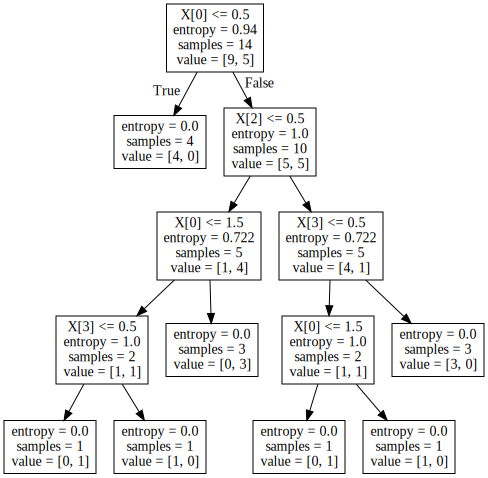

In [159]:
from sklearn.datasets import load_iris
from sklearn import tree

df = pd.read_csv("/home/hp/Desktop/ML-using-Python/tennis.csv")

df['outlook'] = df['outlook'].map({'overcast': 0, 'rainy': 1, 'sunny' : 2})
df['temp'] = df['temp'].map({'hot': 0, 'mild': 1, 'cool' : 2})
df['humidity'] = df['humidity'].map({'high': 0, 'normal': 1})
df['windy'] = df['windy'].map({True: 0, False: 1})
df['play'] = df['play'].map({'yes': 0, 'no': 1})

X = df.iloc[:, :4].as_matrix()
Y = df.iloc[:, [4]].as_matrix()

clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X, Y)

import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph